<a href="https://colab.research.google.com/github/AbdulMoiz-MMY/Agentic_AI_Learning/blob/main/Langchain_Hlo_wrd__Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import userdata

GEMINI_API_KEY = userdata.get("GOOGLE_API_KEY")

In [3]:
!pip install -q -U langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 32.9 MB/s eta 0:00:00


In [4]:
!pip install -q -U langchain.google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.5 MB/s eta 0:00:00


In [30]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate

In [31]:
First_prompt = PromptTemplate(
    input_variables = ["question"],
    template = "change this{question} into a good image generative promt?",
)

Second_prompt = PromptTemplate(
    input_variables = ["first_response"],
    template = "read this {first_response} and summarize into Two lines promt for image generation?",
)

Third_prompt = PromptTemplate(
    input_variables = ["second_response"],
    template = "generate the image {second_response} ?",
)


In [46]:
llm = ChatGoogleGenerativeAI(
    api_key = GEMINI_API_KEY,
    model = "gemini-1.5-flash",
    temperature = 0.5,
    max_output_tokens = 775

)

In [47]:
first_chain = First_prompt | llm
second_chain = Second_prompt | llm


In [48]:
import torch
from diffusers import StableDiffusionPipeline # Changed from StableDiffusion3Pipeline


In [49]:



first_response = first_chain.invoke({"question": input("Write the Image generate promt?")})
print("First Chain",first_response.content)
second_response = second_chain.invoke({"first_response":first_response.content})
print("Second Chain ", second_response.content)

print()
print("Generate Image ")

# ... (rest of your code) ...

pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",) # Using the correct pipeline class for v1.4
if torch.cuda.is_available():
  pipe = pipe.to("cuda")

# ... (rest of your code) ...
image = pipe(second_response.content).images[0]

image.save("Find_generate_image.png")
print("Image Generate and saved as 'Find_generate_image.png'")


Write the Image generate promt?image of car
First Chain Please provide the image! I need to see the image of the car to generate a good image generation prompt.  Once you provide it, I will analyze it and give you several options, varying in detail and style.  Tell me also what style you'd prefer (e.g., photorealistic, cartoonish, painterly, etc.) and what aspects of the car are most important to capture.

Second Chain  Please provide the image of the car.  I need the image to create effective prompts.


Generate Image 


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image Generate and saved as 'Find_generate_image.png'


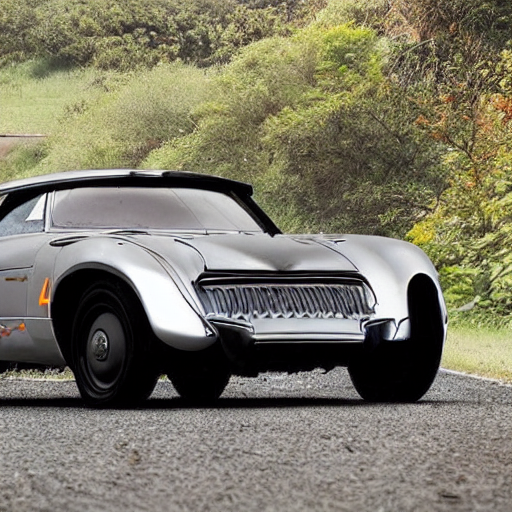

In [50]:
image